In [2]:
import os
import sys
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src import *

In [3]:
process_directory_real_data(os.getcwd())

In [12]:
def plot_distributions(ax, df, title):
    for column in df.columns:
        sns.kdeplot(df[column], ax=ax, label=column)
    
    ax.set_title(f'{title} Distributions')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

def visualize_results(base_path, dataset):
    # Read the summary CSV files
    log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))


    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
    ]

    fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    axes = axes.flatten()

    results = []
    for i, (df, title) in enumerate(dataframes): 
        df = df[df['dataset'] == dataset]
        df = df.drop(columns=['dataset', 'rep'])
        plot_distributions(axes[i], df, title)
        

    plt.tight_layout()
    plt.show()

In [41]:
unique_datasets = pd.read_csv(os.path.join(os.path.join(os.getcwd(), 'results'), 'log_likelihood_summary.csv'))['dataset'].unique()
print(unique_datasets)
dataset_info = pd.read_csv(os.path.join(repo_root, 'datasets', 'dataset_info.csv'))
print(dataset_info)



[104  38  25  52   9  12  53 100  34 103  24]
    dataset_id                               name       N         M   K1    K2
0            1                     irish_election      36    138011    1    14
1            2                             debian      36      3352    1     9
2            4                      netflix_prize     196    163759    3     4
3            6                              skate     249       174   14    30
4            7           electoral_reform_society      30     35610    1    29
5            8               glasgow_city_council     209    188376    1    13
6            9               AGH_course_selection      10       299    7     9
7           10                             skiing     520         8   84   183
8           11                         web_search  116252       311  103  1126
9           12                            t_shirt      12        30   11    11
10          14                              sushi     103     10000   10    10
11    

    dataset_id        name     N    M  K1  K2
42         104  authorship  2177  738   2  25


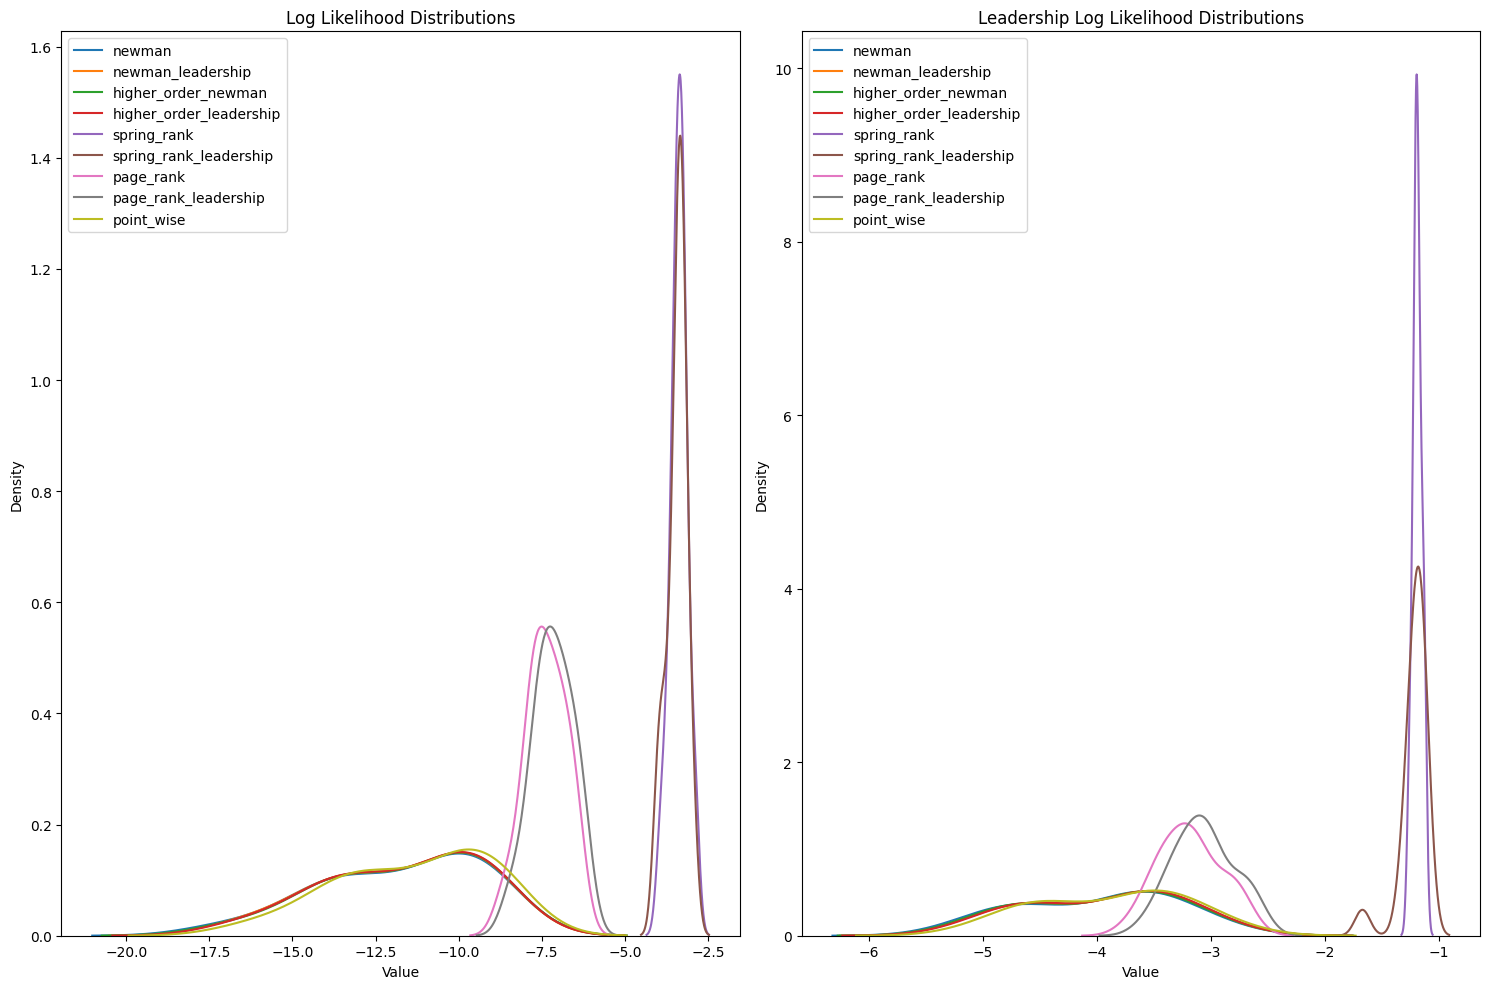

    dataset_id                  name    N    M  K1  K2
20          38  project_bidding_data  148  309   5   6


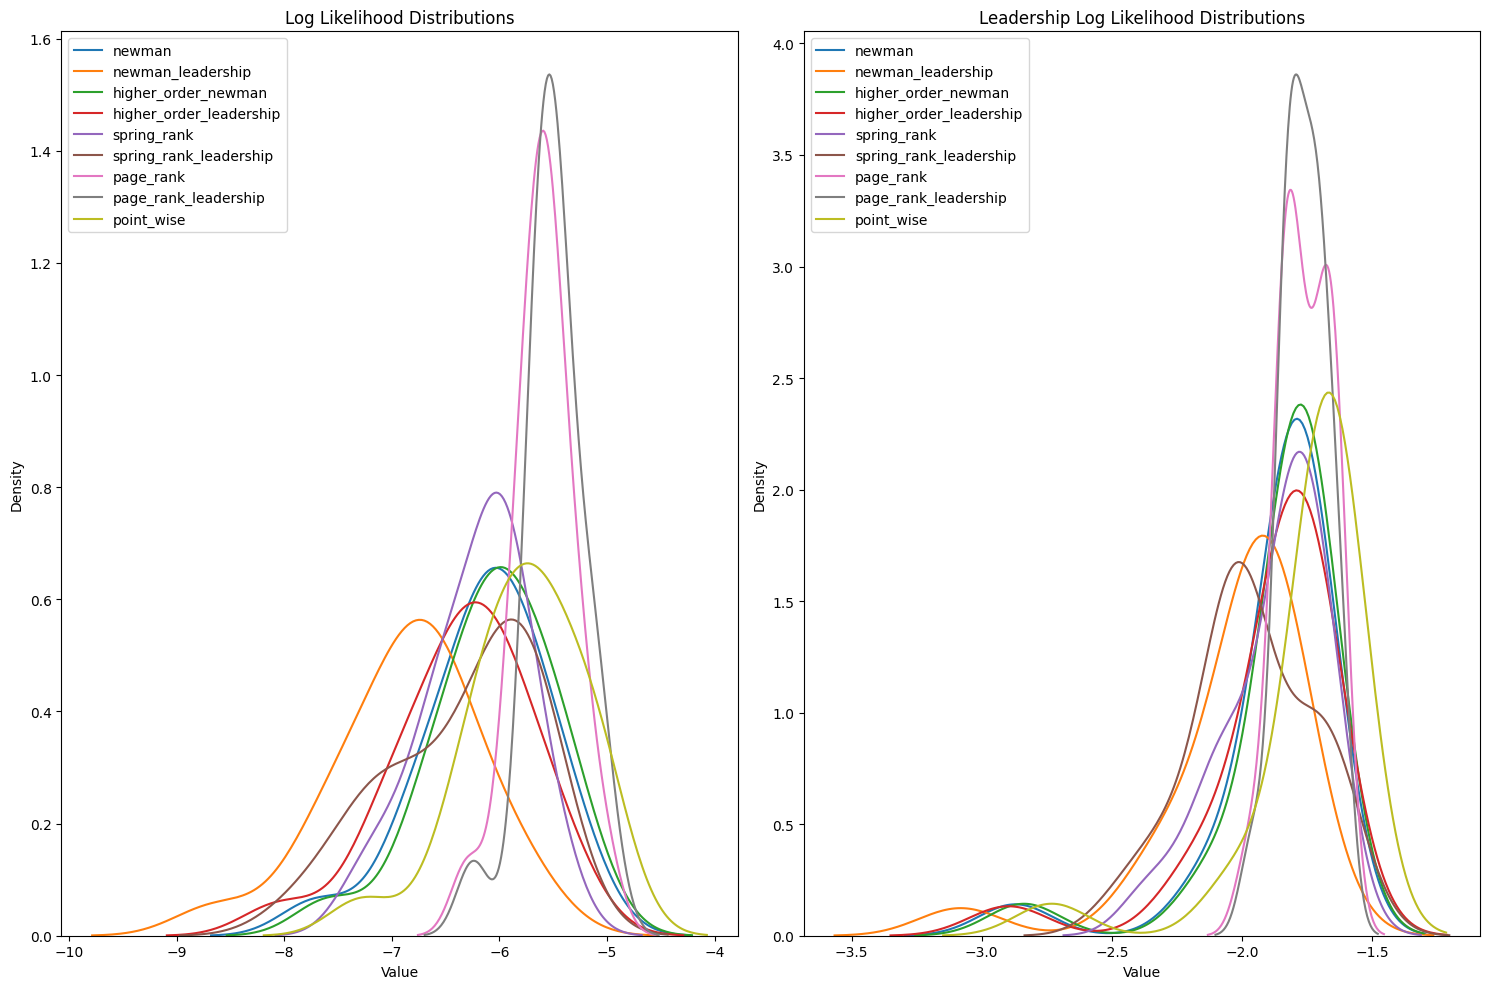

    dataset_id                    name   N     M  K1  K2
14          25  mechanical_turk_puzzle  15  3180   4   4


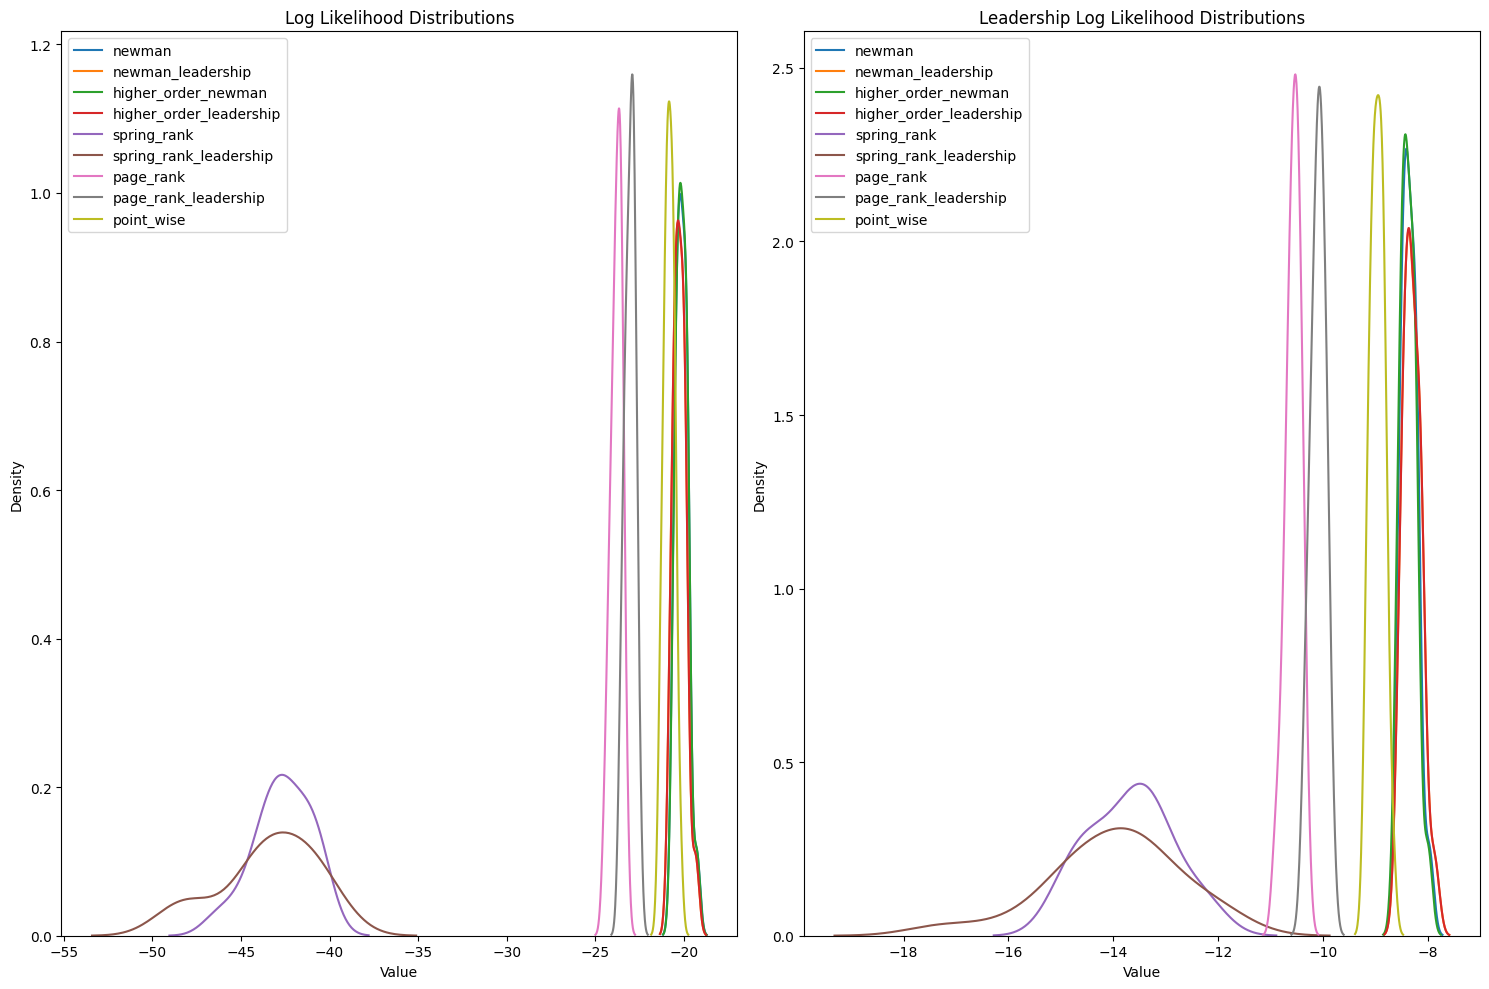

    dataset_id               name    N     M  K1  K2
32          52  formula_1_seasons  851  1814   5  42


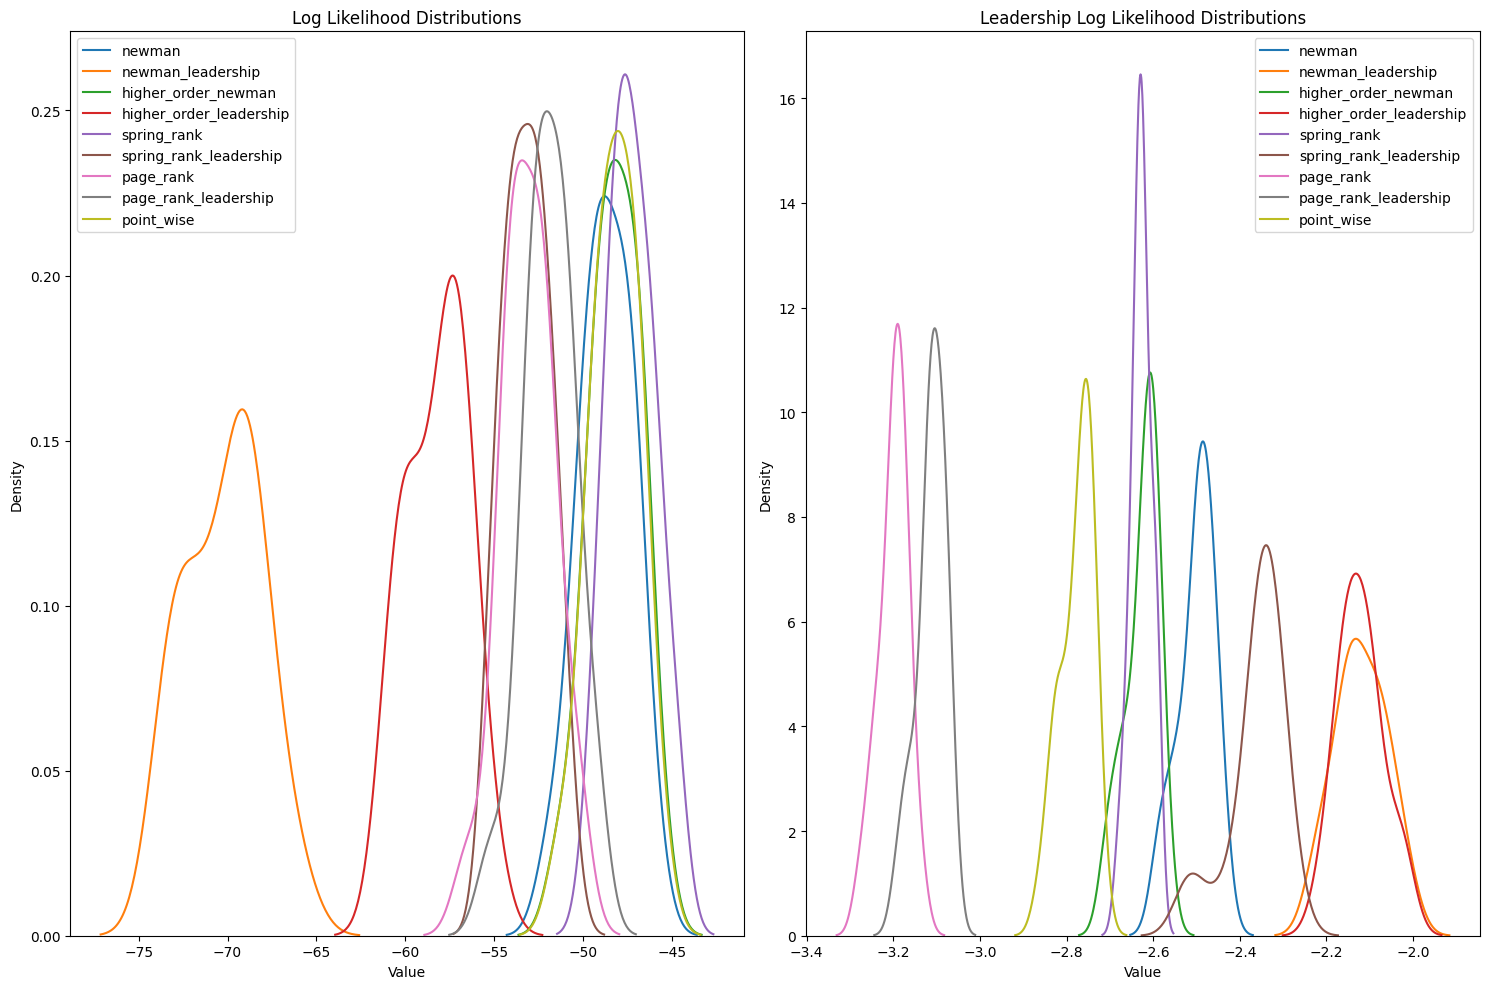

   dataset_id                  name   N    M  K1  K2
6           9  AGH_course_selection  10  299   7   9


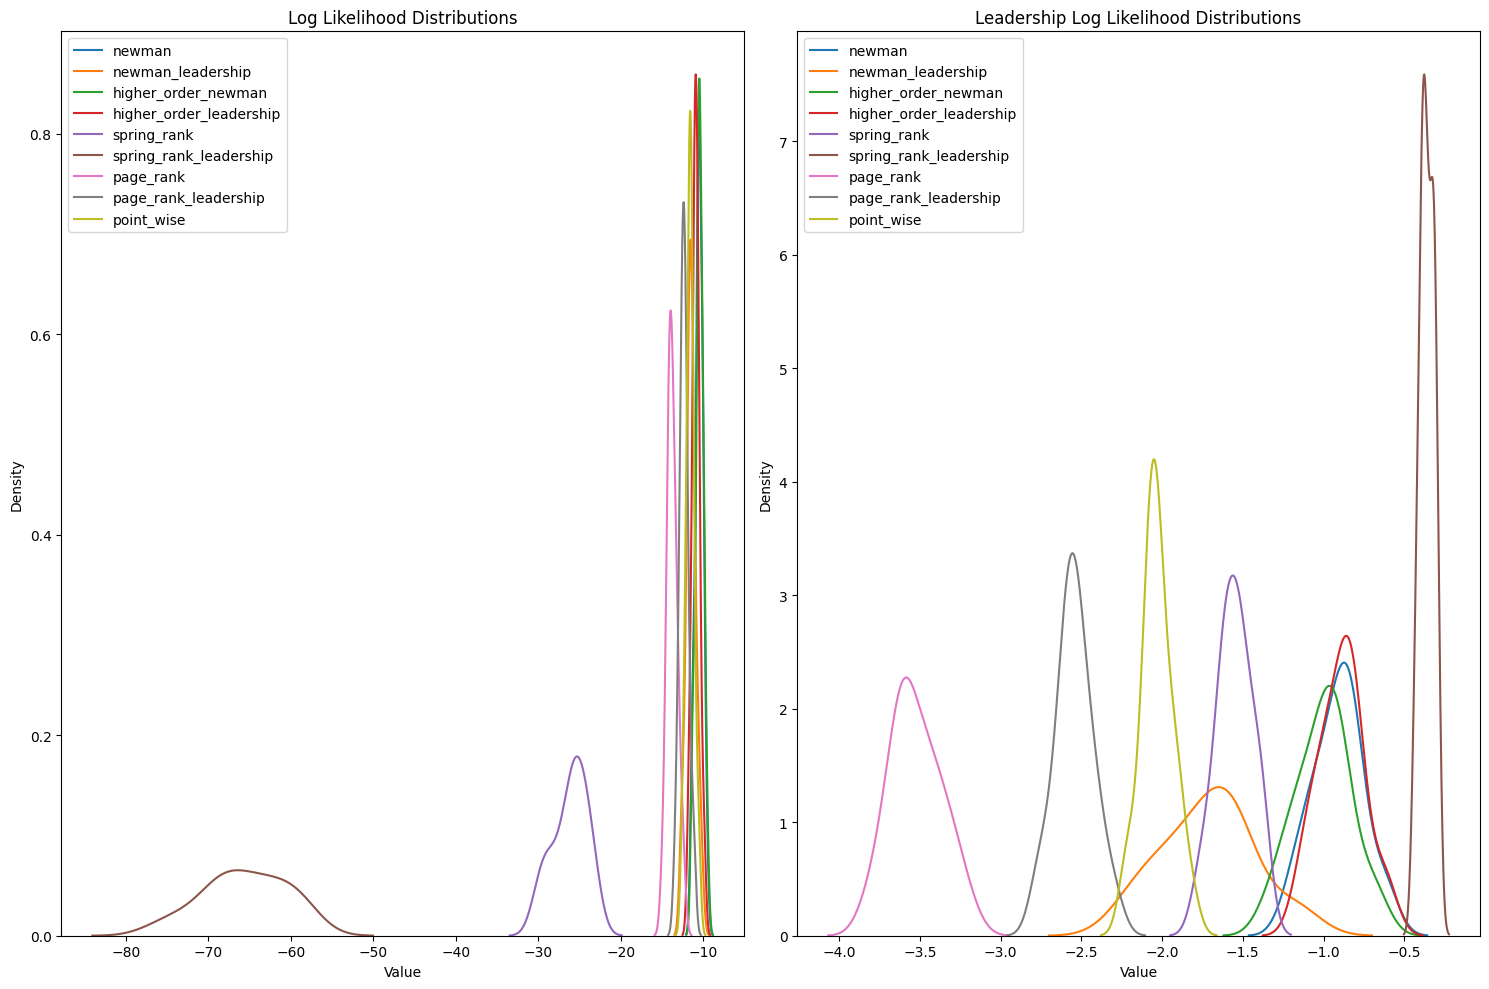

   dataset_id     name   N   M  K1  K2
9          12  t_shirt  12  30  11  11


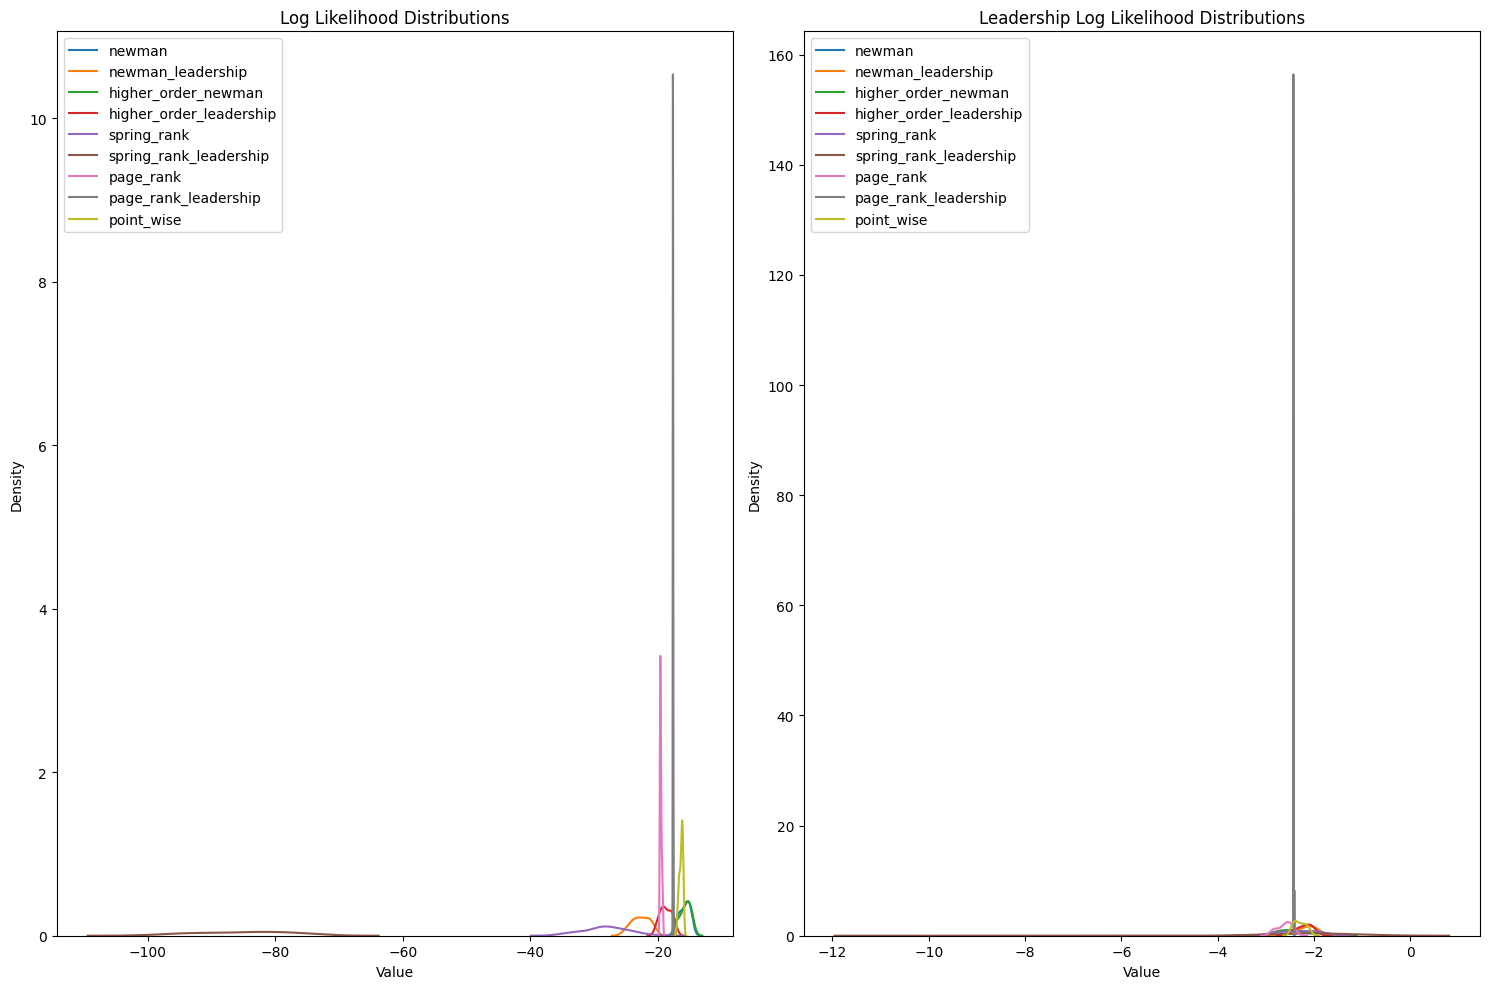

    dataset_id             name    N      M  K1  K2
33          53  formula_1_races  133  48909   2  24


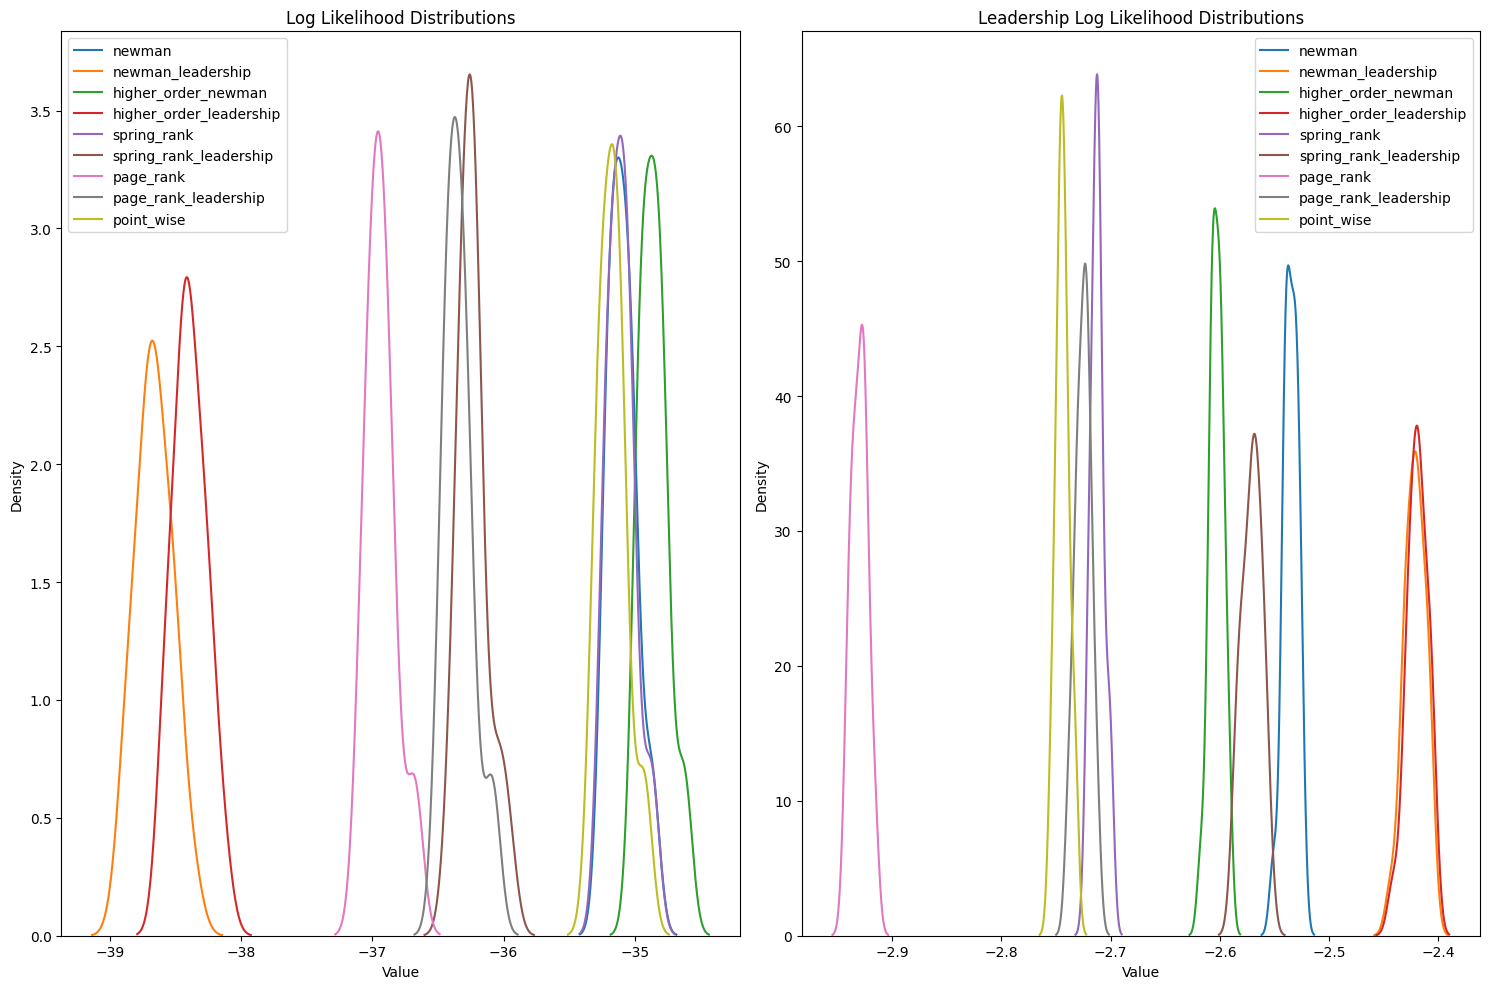

    dataset_id              name     N    M  K1  K2
38         100  olympic_swimming  2060  453   5   8


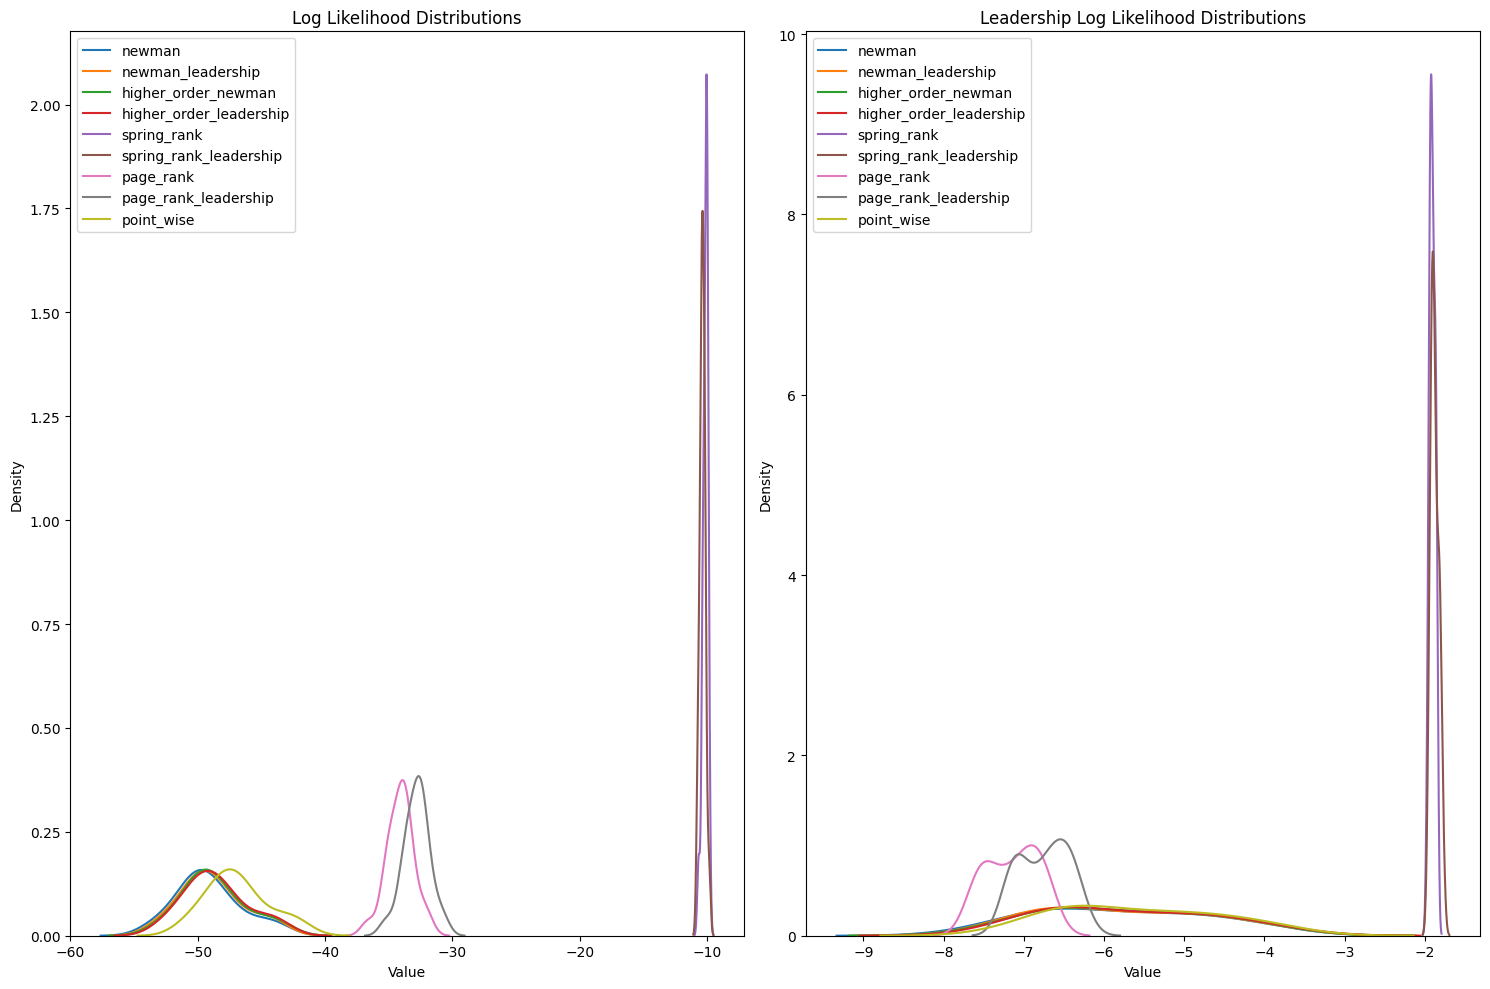

    dataset_id           name   N    M  K1  K2
18          34  cities_survey  85  784   6   6


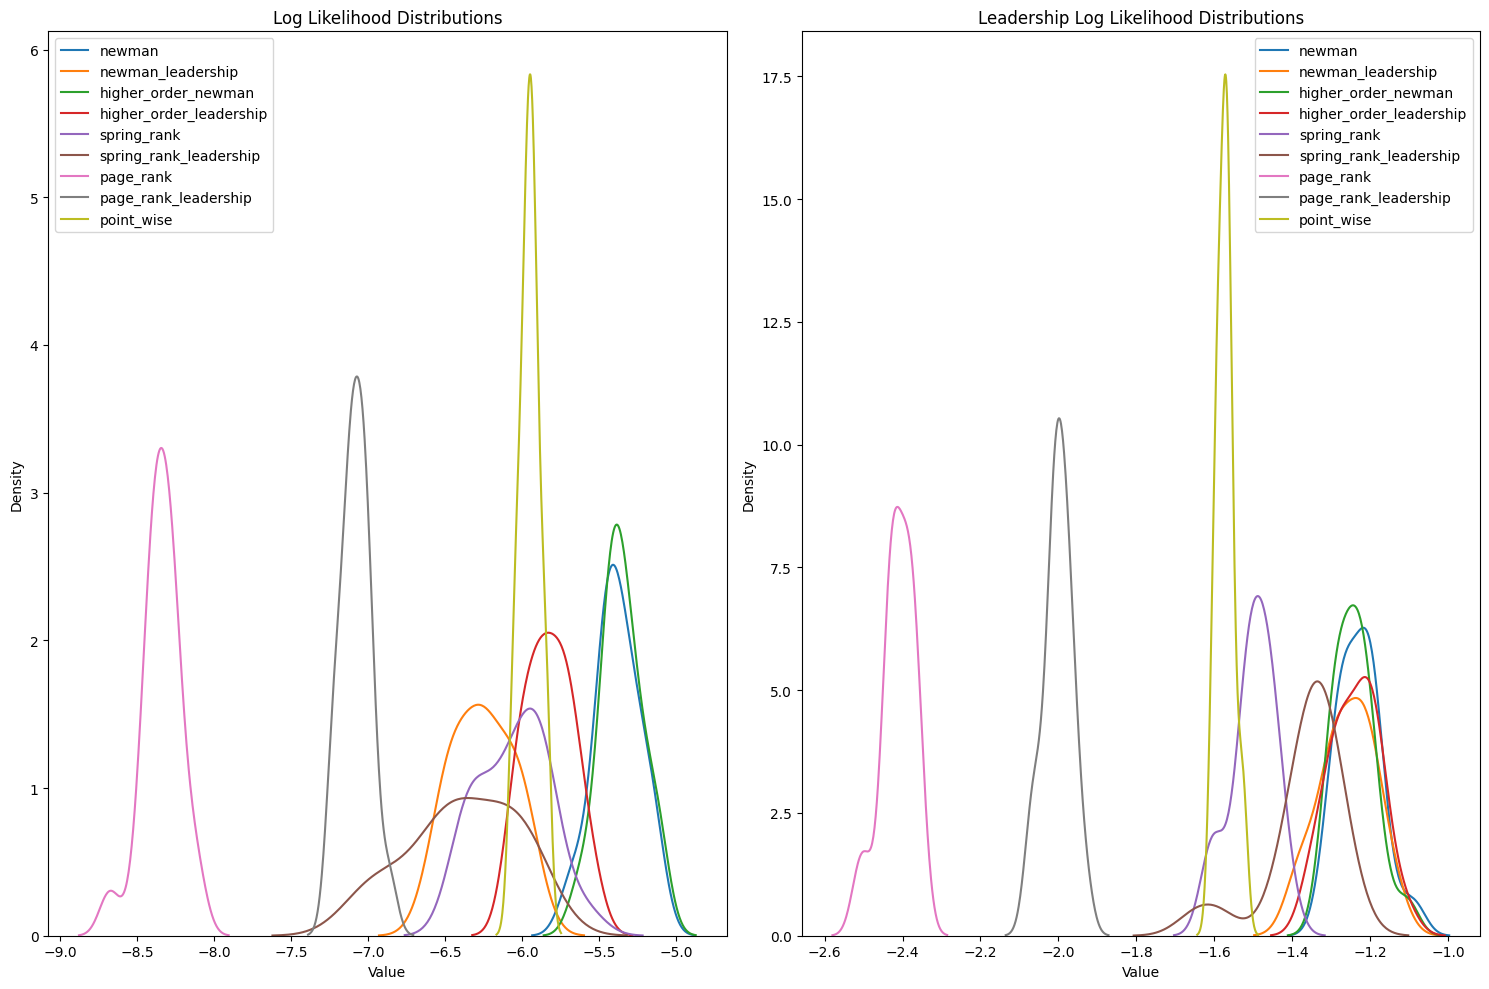

    dataset_id  name   N    M  K1  K2
41         103  FIFA  84  364   2   4


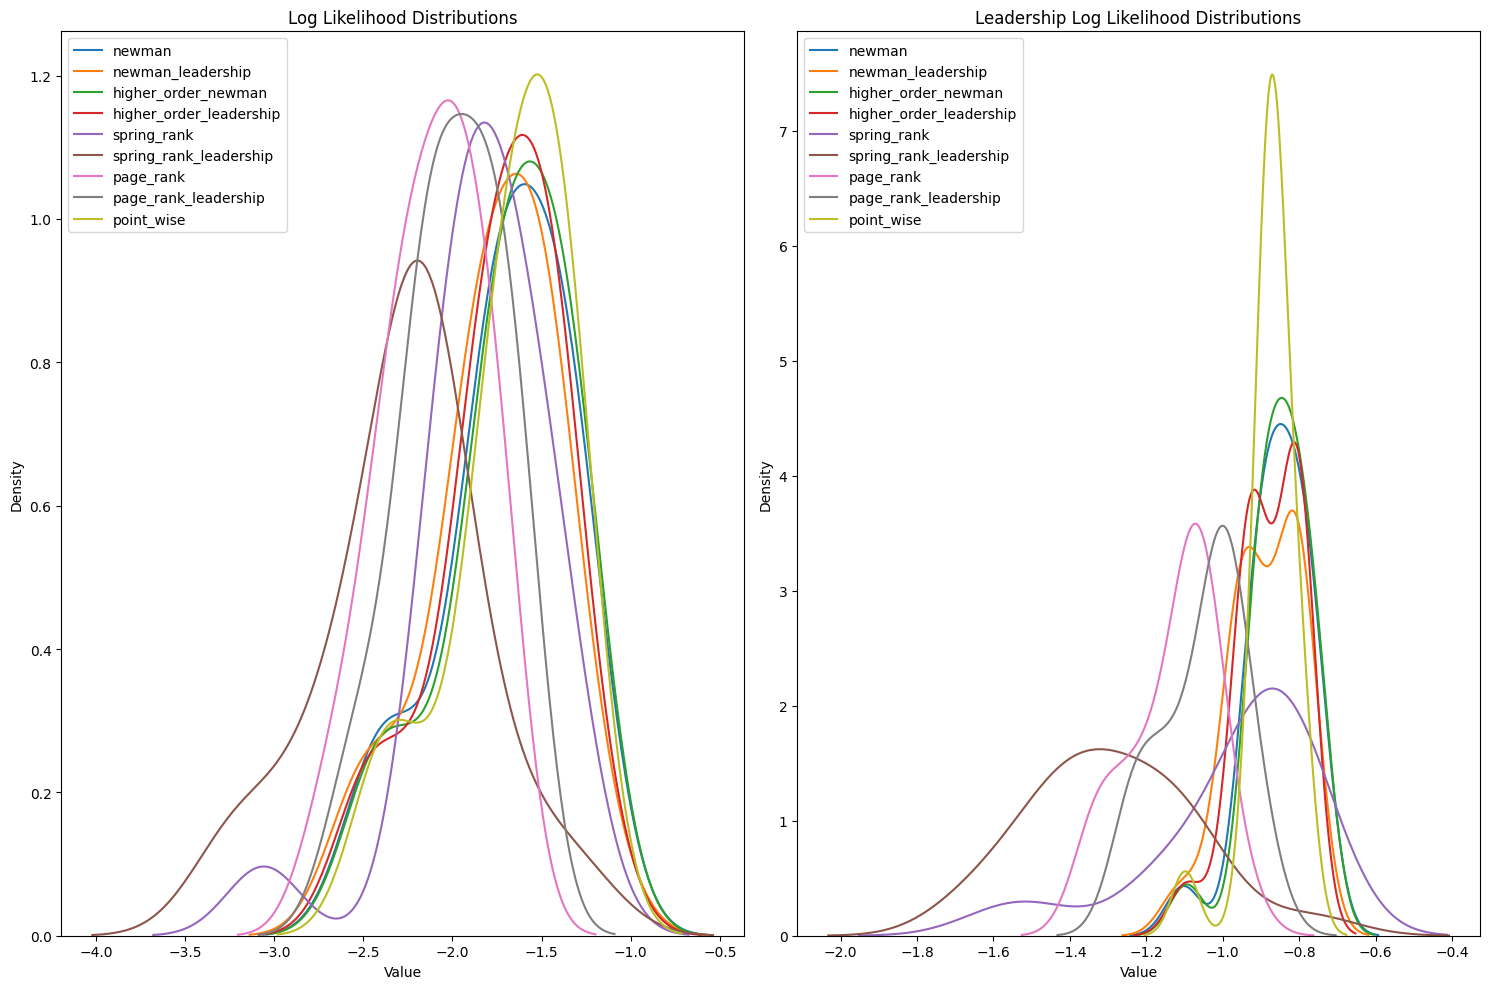

    dataset_id                  name   N     M  K1  K2
13          24  mechanical_turk_dots  13  3183   4   4


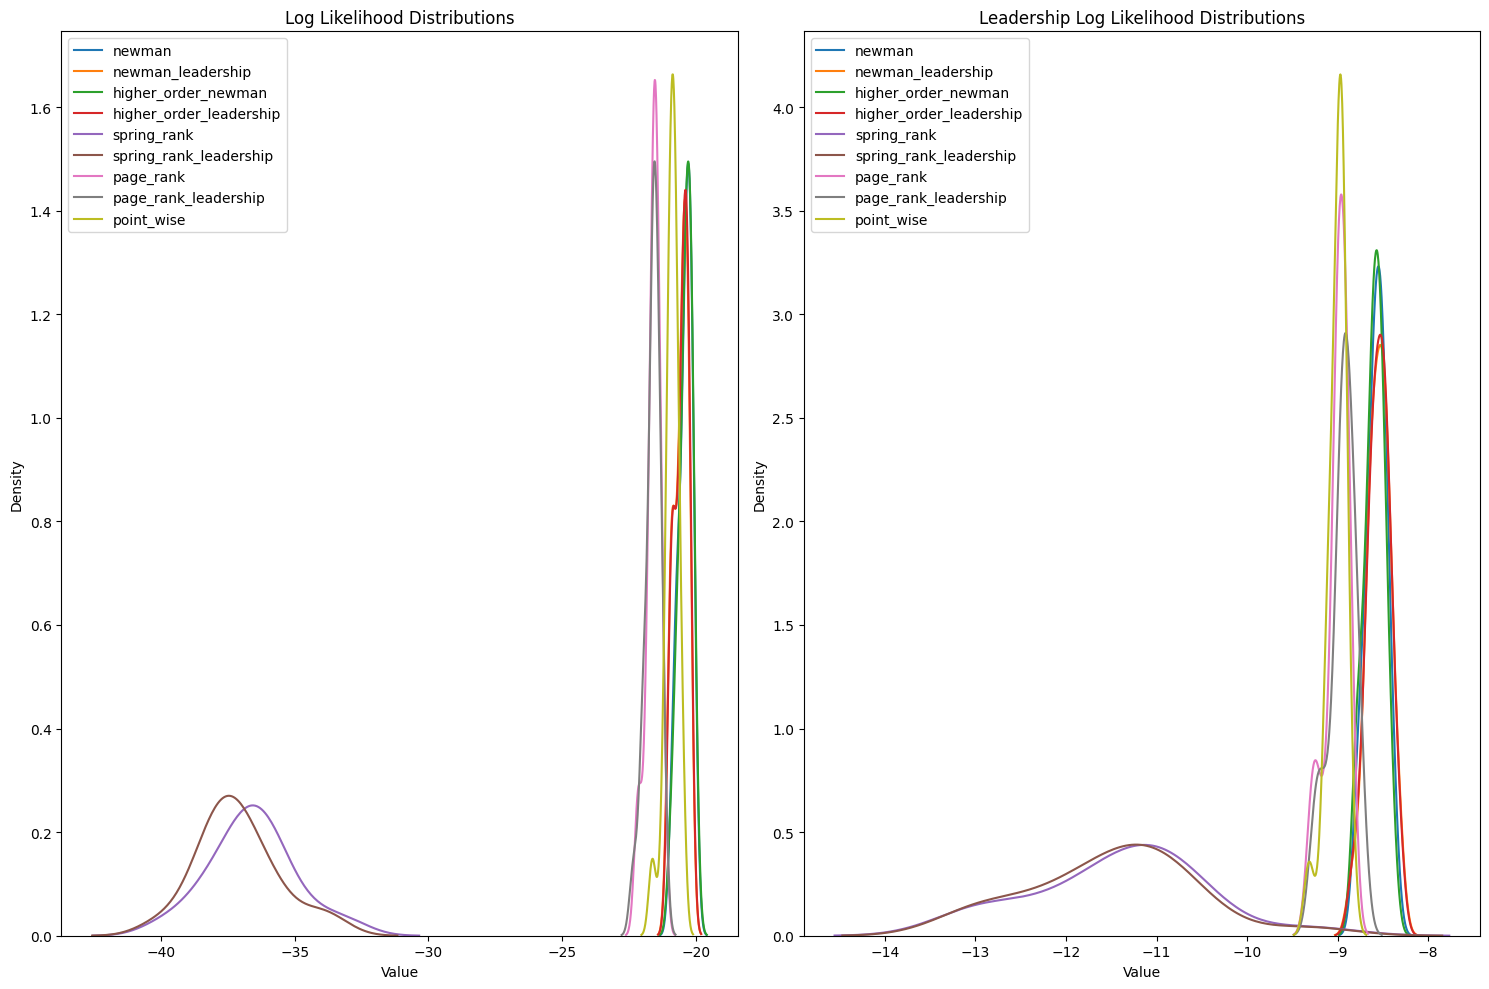

In [42]:

for dataset in unique_datasets:
    dataset_details = dataset_info[dataset_info['dataset_id'] == dataset]
    print(dataset_details)
    visualize_results(os.path.join(os.getcwd(), 'results'), dataset)
